In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv("titanic.csv")

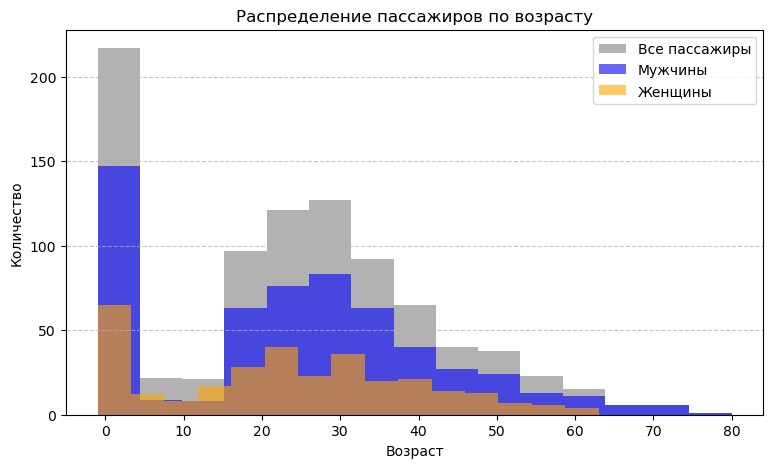

In [17]:
# Обработка пропусков: заполняем их специальным значением
cleaned_data = data.fillna({'Age': -1, 'Embarked': 'Unknown'})

# Разделение на таблицы по полу
men_data = cleaned_data.loc[cleaned_data['Sex'] == 'male']
women_data = cleaned_data.loc[cleaned_data['Sex'] == 'female']

# Построение гистограммы для распределения возрастов
plt.figure(figsize=(9, 5))
plt.hist(cleaned_data['Age'], bins=15, alpha=0.6, label='Все пассажиры', color='grey')
plt.hist(men_data['Age'], bins=15, alpha=0.6, label='Мужчины', color='blue')
plt.hist(women_data['Age'], bins=15, alpha=0.6, label='Женщины', color='orange')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Распределение пассажиров по возрасту')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
# Функция для расчёта статистики возраста
def age_statistics(subset, gender):
    stats = {
        'Минимальный возраст': subset['Age'].min(),
        'Максимальный возраст': subset['Age'].max(),
        'Средний возраст': subset['Age'].mean(),
        'Медиана возраста': subset['Age'].median(),
        'Мода возраста': subset['Age'].mode()[0] if not subset['Age'].mode().empty else 'Нет моды'
    }
    print(f"Статистика возраста ({gender}):")
    for key, value in stats.items():
        print(f"{key}: {value}")
    print()

age_statistics(men_data, 'Мужчины')
age_statistics(women_data, 'Женщины')


Статистика возраста (Мужчины):
Минимальный возраст: -1.0
Максимальный возраст: 80.0
Средний возраст: 23.90844020797227
Медиана возраста: 25.0
Мода возраста: -1.0

Статистика возраста (Женщины):
Минимальный возраст: -1.0
Максимальный возраст: 63.0
Средний возраст: 23.03503184713376
Медиана возраста: 24.0
Мода возраста: -1.0



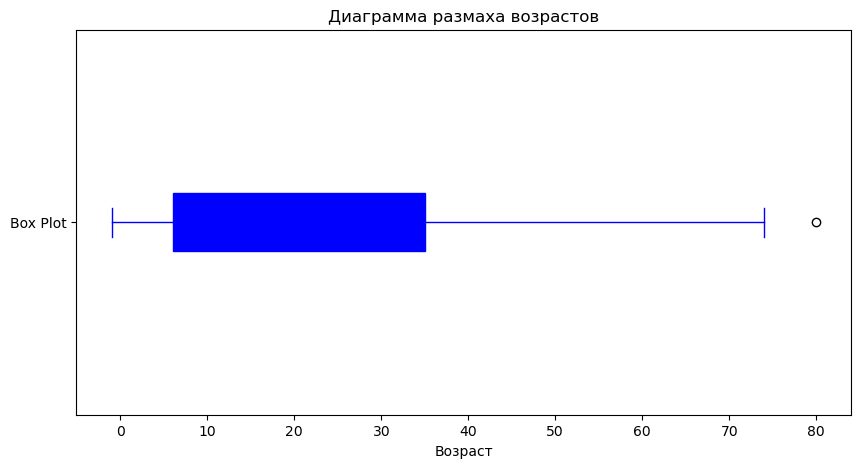

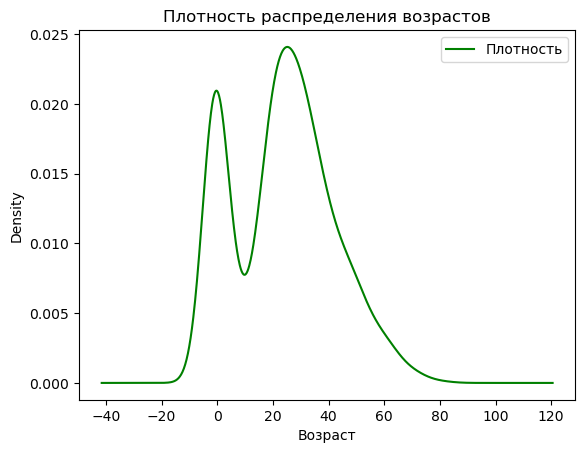

In [21]:
# Разные методы визуализации возрастов
plt.figure(figsize=(10, 5))
cleaned_data['Age'].plot(kind='box', vert=False, patch_artist=True, color='blue', label='Box Plot')
plt.title('Диаграмма размаха возрастов')
plt.xlabel('Возраст')
plt.show()

cleaned_data['Age'].plot(kind='kde', color='green', label='Плотность')
plt.title('Плотность распределения возрастов')
plt.xlabel('Возраст')
plt.legend()
plt.show()

In [23]:
# Преобразование типов данных
cleaned_data['Age'] = pd.to_numeric(cleaned_data['Age'], errors='coerce')
cleaned_data['Age'] = cleaned_data['Age'].astype(np.float16)

# Удаление ненужных колонок
filtered_data = cleaned_data.drop(columns=['Cabin', 'Ticket'])

# Удаление первых двух строк
filtered_data = filtered_data.iloc[2:]

# Вывод информации о результатах
print("Обработанные данные (первые строки):")
print(filtered_data.head())

# Расчёт квартилей
quartiles = cleaned_data['Age'].quantile([0.25, 0.75])
print("Квартильные значения возраста:")
print(quartiles)


Обработанные данные (первые строки):
   PassengerId  Survived  Pclass  \
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   

                                           Name     Sex   Age  SibSp  Parch  \
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
5                              Moran, Mr. James    male  -1.0      0      0   
6                       McCarthy, Mr. Timothy J    male  54.0      0      0   

      Fare Embarked  
2   7.9250        S  
3  53.1000        S  
4   8.0500        S  
5   8.4583        Q  
6  51.8625        S  
Квартильные значения возраста:
0.25     6.0
0.75    35.0
Name: Age, dtype: float64
